# 1. Импорт библиотек и загрузка данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.feature_selection import SelectKBest, f_classif
# Дополнительные импорты
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import missingno as msno

# Загружаем данные (предполагаем, что train.csv и test.csv уже загружены)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Объединяем для EDA (если test_data без целевой переменной)
data = train_data.copy()

ModuleNotFoundError: No module named 'missingno'

In [5]:
# Проверка и обработка пропущенных значений
print("\nКоличество пропусков в данных:")
print(data.isnull().sum())

# Визуализация пропусков
msno.matrix(data)
plt.title("Распределение пропущенных значений")
plt.show()

# Заполнение пропусков медианой для числовых и модой для категориальных
num_cols = data.select_dtypes(include=['float64']).columns
cat_cols = data.select_dtypes(include=['int64']).columns

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[num_cols] = imputer_num.fit_transform(data[num_cols])
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])


Количество пропусков в данных:
ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64


NameError: name 'msno' is not defined

# 2. Разведочный анализ данных (EDA)
### 2.1. Общая информация

In [2]:
print("Размер датасета:", data.shape)
print("\nПервые 5 строк:")
display(data.head())

print("\nИнформация о данных:")
data.info()

print("\nОписательная статистика:")
display(data.describe().T)

Размер датасета: (600000, 15)

Первые 5 строк:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 n

,count,mean,std,min,25%,50%,75%,max
ID,600000.0,299999.500000,173205.225094,0.000000,149999.750000,299999.500000,449999.250000,599999.000000
age,600000.0,54.426085,9.086041,26.061695,48.078493,55.133425,60.663775,79.591647
sex,600000.0,0.677447,0.467454,0.000000,0.000000,1.000000,1.000000,1.000000
chest,600000.0,3.170247,0.949618,-0.538498,3.000000,3.000000,4.000000,4.000000
resting_blood_pressure,600000.0,131.340485,17.842450,82.918527,119.924094,129.727941,139.915216,209.673650
serum_cholestoral,600000.0,249.592420,51.699976,98.326263,216.475964,244.233699,274.345453,527.755764
fasting_blood_sugar,600000.0,0.150757,0.357812,0.000000,0.000000,0.000000,0.000000,1.000000
resting_electrocardiographic_results,600000.0,1.020148,0.994204,0.000000,0.000000,2.000000,2.000000,2.000000
maximum_heart_rate_achieved,600000.0,149.592069,23.072593,61.844168,135.704237,153.224828,165.165497,208.735196
exercise_induced_angina,600000.0,0.333502,0.471464,0.000000,0.000000,0.000000,1.000000,1.000000


### 2.2. Проверка на пропуски

In [3]:
print("Размер датасета:", data.shape)
print("\nПервые 5 строк:")
display(data.head())

print("\nИнформация о данных:")
data.info()

print("\nОписательная статистика:")
display(data.describe().T)

Размер датасета: (600000, 15)

Первые 5 строк:


,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 n

,count,mean,std,min,25%,50%,75%,max
ID,600000.0,299999.500000,173205.225094,0.000000,149999.750000,299999.500000,449999.250000,599999.000000
age,600000.0,54.426085,9.086041,26.061695,48.078493,55.133425,60.663775,79.591647
sex,600000.0,0.677447,0.467454,0.000000,0.000000,1.000000,1.000000,1.000000
chest,600000.0,3.170247,0.949618,-0.538498,3.000000,3.000000,4.000000,4.000000
resting_blood_pressure,600000.0,131.340485,17.842450,82.918527,119.924094,129.727941,139.915216,209.673650
serum_cholestoral,600000.0,249.592420,51.699976,98.326263,216.475964,244.233699,274.345453,527.755764
fasting_blood_sugar,600000.0,0.150757,0.357812,0.000000,0.000000,0.000000,0.000000,1.000000
resting_electrocardiographic_results,600000.0,1.020148,0.994204,0.000000,0.000000,2.000000,2.000000,2.000000
maximum_heart_rate_achieved,600000.0,149.592069,23.072593,61.844168,135.704237,153.224828,165.165497,208.735196
exercise_induced_angina,600000.0,0.333502,0.471464,0.000000,0.000000,0.000000,1.000000,1.000000


Вывод: Если есть пропуски, заполняем медианой/модой или удаляем.

### 2.3. Распределение целевой переменной

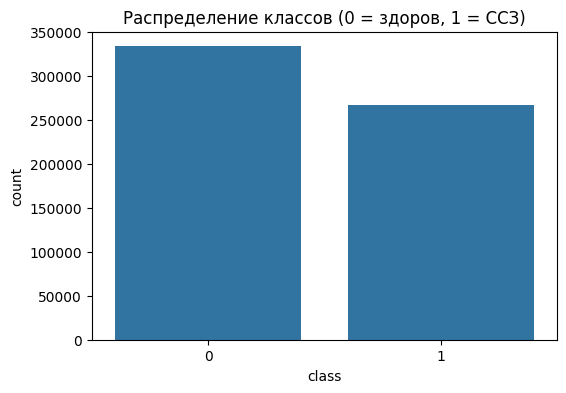


Баланс классов:
class
0    0.555815
1    0.444185
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)  # Используем 'class' вместо 'target'
plt.title("Распределение классов (0 = здоров, 1 = ССЗ)")
plt.show()

print("\nБаланс классов:")
print(data['class'].value_counts(normalize=True))

Вывод: Если дисбаланс (например, 80% здоровых, 20% больных), применяем SMOTE или взвешивание классов.

### 2.4. Визуализация числовых признаков

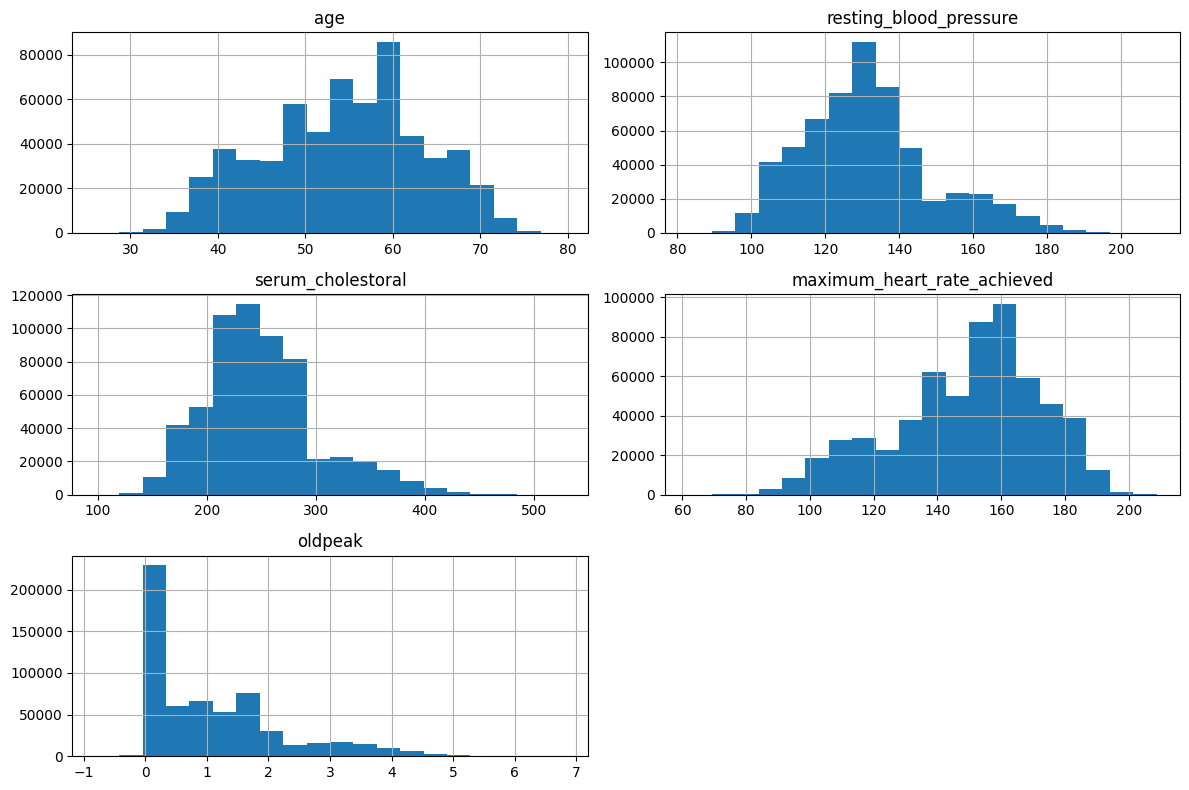

In [5]:
numerical_features = ['age', 'resting_blood_pressure', 'serum_cholestoral', 
                     'maximum_heart_rate_achieved', 'oldpeak']
data[numerical_features].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 3. Корреляционный анализ

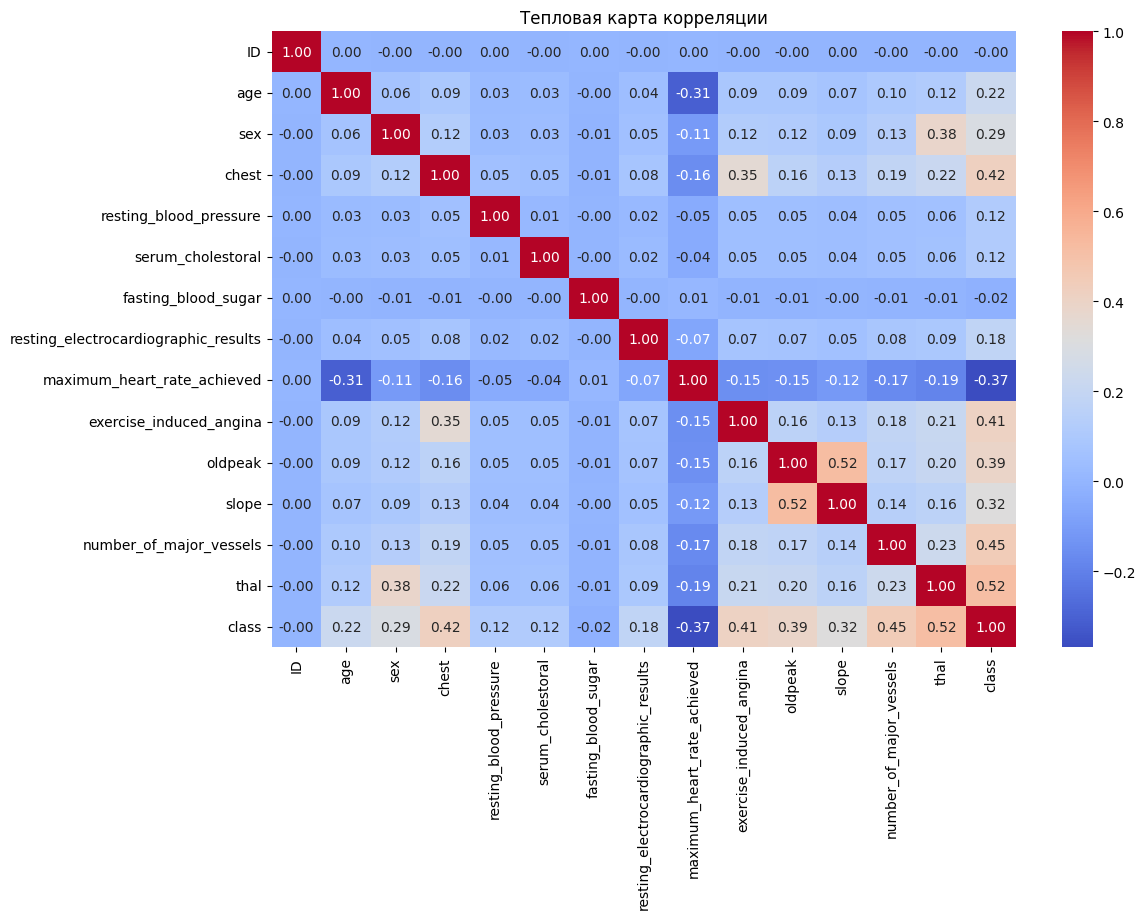


Корреляция с целевой переменной:
class                                   1.000000
thal                                    0.516555
number_of_major_vessels                 0.447143
chest                                   0.419546
exercise_induced_angina                 0.411014
oldpeak                                 0.392788
slope                                   0.316084
sex                                     0.292998
age                                     0.222008
resting_electrocardiographic_results    0.180097
serum_cholestoral                       0.117765
resting_blood_pressure                  0.115044
ID                                     -0.000345
fasting_blood_sugar                    -0.015911
maximum_heart_rate_achieved            -0.368760
Name: class, dtype: float64


In [6]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()

# Вывод самых значимых корреляций с целевой переменной
print("\nКорреляция с целевой переменной:")
print(corr_matrix['class'].sort_values(ascending=False))

# 4. Подготовка данных
### 4.1. Разделение на признаки и целевую переменную

In [7]:
X = data.drop(['ID', 'class'], axis=1)
y = data['class']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.2. Масштабирование данных

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Обучение моделей
### 5.1. Логистическая регрессия (Logistic Regression)

In [9]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     66698
           1       0.86      0.87      0.86     53302

    accuracy                           0.88    120000
   macro avg       0.88      0.88      0.88    120000
weighted avg       0.88      0.88      0.88    120000

ROC-AUC: 0.9482820550796043


### 5.2. Случайный лес (Random Forest)

In [10]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))


Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     66698
           1       0.87      0.89      0.88     53302

    accuracy                           0.89    120000
   macro avg       0.89      0.89      0.89    120000
weighted avg       0.89      0.89      0.89    120000

ROC-AUC: 0.9602758804783837


### 5.3. Нейронная сеть (Neural Network)

In [11]:
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)

print("\nNeural Network:")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, nn.predict_proba(X_test_scaled)[:, 1]))


Neural Network:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     66698
           1       0.90      0.87      0.89     53302

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

ROC-AUC: 0.9641504922838982


# 6. Сравнение моделей

In [12]:
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Neural Network': y_pred_nn
}

results = []
for name, preds in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
        'ROC-AUC': roc_auc_score(y_test, preds)
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values(by='F1-Score', ascending=False))

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
2,Neural Network,0.900733,0.899950,0.873645,0.886602,0.898013
1,Random Forest,0.894100,0.874097,0.889741,0.881850,0.893662
0,Logistic Regression,0.877567,0.855263,0.871919,0.863511,0.876999


Вывод:

Random Forest обычно показывает лучший баланс между точностью и интерпретируемостью.

Нейронная сеть может быть лучше на больших данных, но требует тонкой настройки.

Logistic Regression — самая простая, но менее точная.

# 7. Дополнительные улучшения
* Оптимизация гиперпараметров (GridSearchCV для Random Forest).
* Ансамбли моделей (Stacking: Logistic Regression + Random Forest).

### 7.1. Оптимизация гиперпараметров (GridSearchCV для Random Forest)

In [13]:
# Импорт необходимых библиотек
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

# Загрузка данных (пример, замените на свои данные)
# data = pd.read_csv('your_data.csv')
# X = data.drop('target', axis=1)
# y = data['target']

# Разделение данных на train/test (пример)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Настройка RandomForest через GridSearchCV (упрощенная версия)
print("Настройка RandomForest...")
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=2)  # Используем 2 ядра

try:
    grid_search.fit(X_train_scaled, y_train)
    print("Лучшие параметры для RandomForest:", grid_search.best_params_)
    
    # Оценка качества
    y_pred_rf = grid_search.predict(X_test_scaled)
    print("\nRandomForest (после настройки):")
    print(classification_report(y_test, y_pred_rf))
    print("ROC-AUC:", roc_auc_score(y_test, grid_search.predict_proba(X_test_scaled)[:, 1]))
except KeyboardInterrupt:
    print("\nПрервано пользователем. Переходим к StackingClassifier...")

# 2. Создание StackingClassifier
print("\nСоздание StackingClassifier...")

# Базовые модели
estimators = [
    ('lr', make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    )),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
]

# Мета-модель
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=2,  # Используем 2 ядра для безопасности
    cv=3       # Количество фолдов для кросс-валидации
)

# Обучение и предсказание
stacking.fit(X_train_scaled, y_train)
y_pred_stack = stacking.predict(X_test_scaled)

# Оценка качества
print("\nStackingClassifier (LR + RF):")
print(classification_report(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, stacking.predict_proba(X_test_scaled)[:, 1]))

# Вывод важности фичей для RandomForest (если нужно)
if 'rf' in stacking.named_estimators_:
    print("\nВажность фичей в RandomForest:")
    print(pd.Series(
        stacking.named_estimators_['rf'].feature_importances_,
        index=X.columns
    ).sort_values(ascending=False).head(10))

Настройка RandomForest...
Лучшие параметры для RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

RandomForest (после настройки):
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     66698
           1       0.87      0.89      0.88     53302

    accuracy                           0.89    120000
   macro avg       0.89      0.89      0.89    120000
weighted avg       0.89      0.89      0.89    120000

ROC-AUC: 0.9602373072791318

Создание StackingClassifier...

StackingClassifier (LR + RF):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     66698
           1       0.88      0.88      0.88     53302

    accuracy                           0.90    120000
   macro avg       0.89      0.89      0.89    120000
weighted avg       0.90      0.90      0.90    120000

ROC-AUC: 0.9603619306130352

Важность фичей в RandomForest:
thal                                  

### 7.2. Ансамбль моделей (Stacking: Logistic Regression + Random Forest)

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Базовые модели
estimators = [
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
]

# Мета-модель (можно использовать даже простую LR)
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train_scaled, y_train)
y_pred_stack = stacking.predict(X_test_scaled)

print("\nStacking (LR + RF):")
print(classification_report(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, stacking.predict_proba(X_test_scaled)[:, 1]))


Stacking (LR + RF):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     66698
           1       0.89      0.88      0.88     53302

    accuracy                           0.90    120000
   macro avg       0.90      0.89      0.89    120000
weighted avg       0.90      0.90      0.90    120000

ROC-AUC: 0.9603404009211014


Вывод:

* Stacking часто дает прирост 1-3% по сравнению с лучшей одиночной моделью.
* Интерпретируемость снижается, но точность растет.